## WholeFoods Market Location

Today, people's interest about the organic foods is growing. 
The company operates more than 500 stores throughout the US, Canada, and the UK.

I ‘m wondering what factor is affecting to decide the place where wholefoods store opened.
first of all, I found the store information in thE website throught the website "store locatior" with selenium
second, I found the population data from wikidipia.
THIRD, I collect Lifestyle dataset in the  Missouri economic research and information center.

git hub link https://github.com/ava000/wholefoods.git

In [ ]:
state_str = """Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
IllinoisIndiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
MontanaNebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming"""

state_list = state_str.split("\n")

state_list

In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
import re
import pandas as pd
options = Options()

driver_adress = r'C:/Users/magnolia00/Desktop/chromedriver_win32/chromedriver.exe'
driver = webdriver.Chrome(driver_adress, options=options)
driver.implicitly_wait(5)


driver.get("https://www.wholefoodsmarket.com/stores")




In [363]:
# beautiful soup
from bs4 import BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

In [365]:
raw_html = soup.find("wfm-store-list")

raw_store_list = raw_html.find_all("div", {"class":"w-store-finder-core-info"})



In [366]:
store_list = []
for store in raw_store_list:

SyntaxError: unexpected EOF while parsing (<ipython-input-366-b6f08957b374>, line 2)

In [23]:
import pandas as pd

In [15]:
text_input = driver.find_element_by_id("store-finder-search-bar")

store_list = []
for state_name in state_list:
    text_input.send_keys(state_name)
    text_input.send_keys(Keys.ENTER)
    time.sleep(5)


    html = driver.page_source

    soup = BeautifulSoup(html, 'html.parser')

    raw_html = soup.find("wfm-store-list")
    raw_store_list = raw_html.find_all("div", {"class":"w-store-finder-core-info"})

    for store in raw_store_list:
        store_name = store.find("a").get_text()

        address_tags = store.find_all("div", {"class":"w-store-finder-mailing-address"})
        address = " ".join([item.get_text() for item in address_tags])

        store_tuple = (state_name, store_name, address)
        store_list.append(store_tuple)
        
    try:
        driver.find_element_by_id("sf-close-icon").click()
    except:
        driver.find_element_by_id("sf-search-icon").click()
        driver.find_element_by_id("sf-close-icon").click()

    time.sleep(1)
   

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=86.0.4240.111)


In [13]:
text_input = driver.find_element_by_id("store-finder-search-bar")

store_list = []
for state_name in state_list:
    text_input.send_keys(state_name)
    text_input.send_keys(Keys.ENTER)
    time.sleep(5)


    html = driver.page_source

    soup = BeautifulSoup(html, 'html.parser')

    raw_html = soup.find("wfm-store-list")
    raw_store_list = raw_html.find_all("div", {"class":"w-store-finder-core-info"})

    for store in raw_store_list:
        store_name = store.find("a").get_text()

        address_tags = store.find_all("div", {"class":"w-store-finder-mailing-address"})
        address = " ".join([item.get_text() for item in address_tags])

        store_tuple = (state_name, store_name, address)
        store_list.append(store_tuple)
    
    text_input.clear()
    time.sleep(1)

WebDriverException: Message: chrome not reachable
  (Session info: chrome=86.0.4240.111)


In [16]:
 pd.DataFrame(store_list, columns=["state","store","address"])

,state,store,address
0,Alabama,Huntsville,"2501 Memorial Pkwy SW Huntsville, AL 35801"
1,Alabama,Mountain Brook,"3100 Cahaba Village Plaza Birmingham, AL 35243"
2,Alabama,Montgomery,"1450 Taylor Rd Montgomery, AL 36117"
3,Alabama,Mobile,"3968 Airport Blvd Mobile, AL 36608"
4,Arizona,Flagstaff,"320 S Cambridge Ln Flagstaff, AZ 86001"
...,...,...,...
464,Washington,West Seattle,"4755 Fauntleroy Way SW, Ste 190 Seattle, WA 98116"
465,Washington,Chambers Bay,"3515 Bridgeport Way W University Place, WA 98466"
466,Wisconsin,Milwaukee,"2305 N Prospect Ave Milwaukee, WI 53211"
467,Wisconsin,Wauwatosa,"11100 W Burleigh St Wauwatosa, WI 53222"


In [17]:
 pd.DataFrame(store_list, columns=["state","store","address"])

,state,store,address
0,Alabama,Huntsville,"2501 Memorial Pkwy SW Huntsville, AL 35801"
1,Alabama,Mountain Brook,"3100 Cahaba Village Plaza Birmingham, AL 35243"
2,Alabama,Montgomery,"1450 Taylor Rd Montgomery, AL 36117"
3,Alabama,Mobile,"3968 Airport Blvd Mobile, AL 36608"
4,Arizona,Flagstaff,"320 S Cambridge Ln Flagstaff, AZ 86001"
...,...,...,...
464,Washington,West Seattle,"4755 Fauntleroy Way SW, Ste 190 Seattle, WA 98116"
465,Washington,Chambers Bay,"3515 Bridgeport Way W University Place, WA 98466"
466,Wisconsin,Milwaukee,"2305 N Prospect Ave Milwaukee, WI 53211"
467,Wisconsin,Wauwatosa,"11100 W Burleigh St Wauwatosa, WI 53222"


In [18]:
location = pd.DataFrame(store_list, columns=["state","store","address"])
location


,state,store,address
0,Alabama,Huntsville,"2501 Memorial Pkwy SW Huntsville, AL 35801"
1,Alabama,Mountain Brook,"3100 Cahaba Village Plaza Birmingham, AL 35243"
2,Alabama,Montgomery,"1450 Taylor Rd Montgomery, AL 36117"
3,Alabama,Mobile,"3968 Airport Blvd Mobile, AL 36608"
4,Arizona,Flagstaff,"320 S Cambridge Ln Flagstaff, AZ 86001"
...,...,...,...
464,Washington,West Seattle,"4755 Fauntleroy Way SW, Ste 190 Seattle, WA 98116"
465,Washington,Chambers Bay,"3515 Bridgeport Way W University Place, WA 98466"
466,Wisconsin,Milwaukee,"2305 N Prospect Ave Milwaukee, WI 53211"
467,Wisconsin,Wauwatosa,"11100 W Burleigh St Wauwatosa, WI 53222"


In [19]:
location = pd.DataFrame(store_list, columns=["state","store","address"])
location


,state,store,address
0,Alabama,Huntsville,"2501 Memorial Pkwy SW Huntsville, AL 35801"
1,Alabama,Mountain Brook,"3100 Cahaba Village Plaza Birmingham, AL 35243"
2,Alabama,Montgomery,"1450 Taylor Rd Montgomery, AL 36117"
3,Alabama,Mobile,"3968 Airport Blvd Mobile, AL 36608"
4,Arizona,Flagstaff,"320 S Cambridge Ln Flagstaff, AZ 86001"
...,...,...,...
464,Washington,West Seattle,"4755 Fauntleroy Way SW, Ste 190 Seattle, WA 98116"
465,Washington,Chambers Bay,"3515 Bridgeport Way W University Place, WA 98466"
466,Wisconsin,Milwaukee,"2305 N Prospect Ave Milwaukee, WI 53211"
467,Wisconsin,Wauwatosa,"11100 W Burleigh St Wauwatosa, WI 53222"


In [20]:
location[location['state']== 'California']

,state,store,address
16,California,Palm Desert,"44-459 Town Center Way Palm Desert, CA 92260"
17,California,South Lake Tahoe,"3600 Lake Tahoe Blvd. South Lake Tahoe, CA 96150"
18,California,Upland,"2153 W Baseline Rd Upland, CA 91784"
19,California,Del Mar,"2600 Via De La Valle, Ste 100 San Diego, CA 92014"
20,California,Hillcrest,"711 University Ave San Diego, CA 92103"
...,...,...,...
103,California,Blithedale,"731 E Blithedale Ave Mill Valley, CA 94941"
104,California,Mill Valley,"414 Miller Ave Mill Valley, CA 94941"
105,California,Ocean,"1150 Ocean Ave San Francisco, CA 94112"
106,California,Monterey,"800 Del Monte Center Monterey, CA 93940"


In [21]:
location[location['state']=='California'].count()

state      92
store      92
address    92
dtype: int64

In [22]:
location.to_csv('wholefoods.csv')

In [23]:
[city.split()[-3] for city in location["address"]][0]

'Huntsville,'

In [24]:
[city.split()[-3].replace(',','') for city in location["address"]][0]

'Huntsville'

In [25]:
[i.split()[-1] for i in location["address"]][0]

'35801'

In [26]:
location["city"] = [city.split()[-3].replace(',','') for city in location["address"]]
location["zipcode"] = [i.split()[-1] for i in location["address"]]
location

,state,store,address,city,zipcode
0,Alabama,Huntsville,"2501 Memorial Pkwy SW Huntsville, AL 35801",Huntsville,35801
1,Alabama,Mountain Brook,"3100 Cahaba Village Plaza Birmingham, AL 35243",Birmingham,35243
2,Alabama,Montgomery,"1450 Taylor Rd Montgomery, AL 36117",Montgomery,36117
3,Alabama,Mobile,"3968 Airport Blvd Mobile, AL 36608",Mobile,36608
4,Arizona,Flagstaff,"320 S Cambridge Ln Flagstaff, AZ 86001",Flagstaff,86001
...,...,...,...,...,...
464,Washington,West Seattle,"4755 Fauntleroy Way SW, Ste 190 Seattle, WA 98116",Seattle,98116
465,Washington,Chambers Bay,"3515 Bridgeport Way W University Place, WA 98466",Place,98466
466,Wisconsin,Milwaukee,"2305 N Prospect Ave Milwaukee, WI 53211",Milwaukee,53211
467,Wisconsin,Wauwatosa,"11100 W Burleigh St Wauwatosa, WI 53222",Wauwatosa,53222


In [27]:
locaiton["state"]

NameError: name 'locaiton' is not defined

In [28]:
df = location.groupby(by='state')['state'].count()
df

state
Alabama            4
Arizona           10
Arkansas           2
California        92
Colorado          21
Connecticut        9
Florida           32
Georgia           12
Hawaii             4
Idaho              1
Iowa               1
Kansas             6
Kentucky           2
Louisiana          7
Maine              1
Maryland          10
Massachusetts     33
Michigan           7
Minnesota          7
Mississippi        1
Missouri           4
Nevada             5
New Hampshire      2
New Jersey        22
New Mexico         3
New York          26
North Carolina    15
Ohio              12
Oklahoma           3
Oregon            10
Pennsylvania      15
Rhode Island       3
South Carolina     5
Tennessee          7
Texas             36
Utah               4
Virginia          15
Washington        17
Wisconsin          3
Name: state, dtype: int64

In [29]:
df = location.groupby(by='state')['state'].count()
df

state
Alabama            4
Arizona           10
Arkansas           2
California        92
Colorado          21
Connecticut        9
Florida           32
Georgia           12
Hawaii             4
Idaho              1
Iowa               1
Kansas             6
Kentucky           2
Louisiana          7
Maine              1
Maryland          10
Massachusetts     33
Michigan           7
Minnesota          7
Mississippi        1
Missouri           4
Nevada             5
New Hampshire      2
New Jersey        22
New Mexico         3
New York          26
North Carolina    15
Ohio              12
Oklahoma           3
Oregon            10
Pennsylvania      15
Rhode Island       3
South Carolina     5
Tennessee          7
Texas             36
Utah               4
Virginia          15
Washington        17
Wisconsin          3
Name: state, dtype: int64

In [307]:
df = location.groupby(by='state')['state'].count()
df1 = pd.DataFrame(df, columns = ['state', 'count'])
df1

,state,count
state,,
Alabama,4,NaN
Alaska,4,NaN
Arkansas,10,NaN
California,2,NaN
Colorado,92,NaN
Connecticut,21,NaN
Delaware,9,NaN
Georgia,32,NaN
Hawaii,12,NaN


In [30]:
state_count = location.groupby(by= 'state')['state'].count()
state_count = pd.DataFrame([state_count.index, state_count]).T
state_count.columns = ['state', 'count']
state_count

,state,count
0,Alabama,4
1,Arizona,10
2,Arkansas,2
3,California,92
4,Colorado,21
5,Connecticut,9
6,Florida,32
7,Georgia,12
8,Hawaii,4
9,Idaho,1


In [31]:
store_count1 = location.groupby(by='state').count()
store_count1 = df.reset_index()
store_count1= df_count[['state','store']]
store_count1 

ValueError: cannot insert state, already exists

In [32]:
state_count = location.groupby(by='state')['state'].count()
state_count = pd.DataFrame([state_count.index, state_count]).T
state_count.columns = ['state', 'count']
state_count

,state,count
0,Alabama,4
1,Arizona,10
2,Arkansas,2
3,California,92
4,Colorado,21
5,Connecticut,9
6,Florida,32
7,Georgia,12
8,Hawaii,4
9,Idaho,1


In [283]:
state_count = [list(state_count),state_count.index]

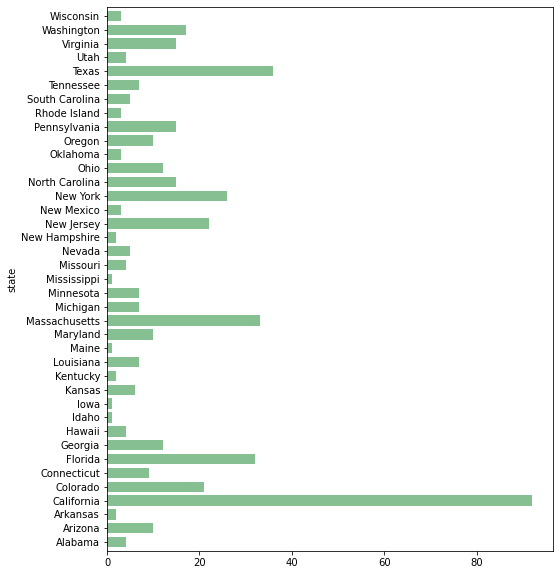

In [33]:
state_count = location.groupby(by='state')['state'].count()

state_count.plot(kind='barh', figsize=(8, 10), color='#86bf91', width=0.75)

In [34]:
store_count_by_state.plot(kind='barh', figsize=(8, 10), color='#86bf91', width=0.75)

NameError: name 'store_count_by_state' is not defined

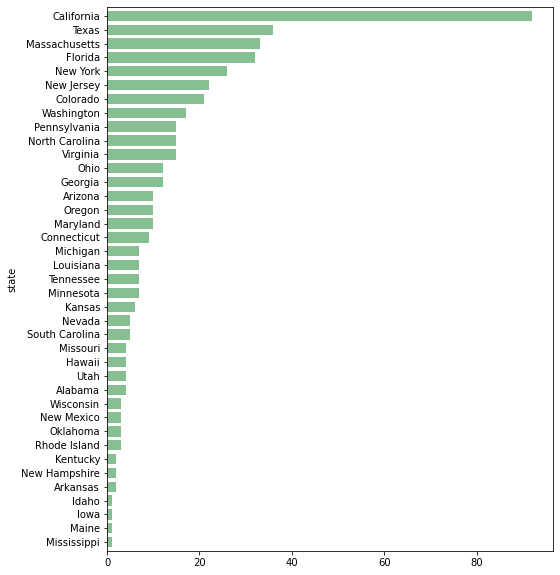

In [35]:
state_count.sort_values().plot(kind='barh', figsize=(8, 10), color='#86bf91', width=0.75)

In [315]:
store_count_by_state = location.groupby('state')['state'].count()

In [316]:
store_count_by_state

state
Alabama                      4
Alaska                       4
Arkansas                    10
California                   2
Colorado                    92
Connecticut                 21
Delaware                     9
Georgia                     32
Hawaii                      12
Idaho                        4
IllinoisIndiana              1
Kansas                       1
Kentucky                     6
Louisiana                    2
Maine                        7
Maryland                     1
Massachusetts               10
Michigan                    33
Minnesota                    7
Mississippi                  7
Missouri                     1
MontanaNebraska              4
New Hampshire                5
New Jersey                   2
New Mexico                  22
New York                     3
North Carolina              26
North Dakota                15
Oklahoma                    12
Oregon                       3
PennsylvaniaRhode Island    10
South Dakota                 5
Te

In [155]:
result = [state for state in state_list
          if state not in store_count_by_state.index]
            
result

['Arizona',
 'Florida',
 'Iowa',
 'Nevada',
 'Ohio',
 'South Carolina',
 'Tennessee',
 'Virginia',
 'Wisconsin']

In [201]:
result = [state for state in state_list
          if state not in store_count_by_state.index]
            
result

['Arizona',
 'Florida',
 'Iowa',
 'Nevada',
 'Ohio',
 'South Carolina',
 'Tennessee',
 'Virginia',
 'Wisconsin']

In [37]:
import pandas as pd
populataion = pd.read_excel ('US_population.xlsx')
population_csv = populataion.to_csv ('US_population.csv', index = None, header=True)
population1 = pd.read_csv('US_population.csv')

In [38]:
population1.columns = ['state','population as of 2019']
population1.head()

,state,population as of 2019
0,California,39512223
1,Texas,28995881
2,Florida,21477737
3,New York,19453561
4,Pennsylvania,12801989


In [ ]:
#population1.sort_values(by=['state'], ascending = True)

In [274]:
population1['state'][0]

'California'

In [40]:
population1['state'] = [state.replace('\xa0','') for state in population1['state']]

population1['state'][0]

'California'

In [260]:
#new_population = population1.sort_values(by=['state'], ascending = True)

In [ ]:
population_count = pd.merge(population1, state_count,  on='state' )

In [43]:
import pandas as pd
livingcost = pd.read_excel ('livingcost.xlsx')
livingcost_csv = livingcost.to_csv('livingcost.csv')
livingcost1 = pd.read_csv('livingcost.csv', index_col=0)

In [44]:
livingcost1.head()

,State,Rank,living cost Index,Grocery,Housing,Utilities,Transportation,Health,Misc.
0,Mississippi,1,84.8,93.1,66.7,91.8,89.9,89.0,92.0
1,Oklahoma,2,86.8,94.1,70.1,95.8,91.3,93.1,92.5
2,Arkansas,3,87.8,90.7,75.2,92.7,86.1,86.2,95.7
3,Kansas,4,87.9,92.8,71.8,99.4,94.8,98.4,92.3
4,Missouri,5,88.9,97.6,71.6,97.5,93.9,97.6,94.3


In [45]:
import pandas as pd
livingcost = pd.read_excel ('livingcost.xlsx')
livingcost_csv = populataion.to_csv('livingcost.csv')
livingcost1 = pd.read_csv('livingcost.csv', index_col=0)

In [140]:
data= pd.merge(population1, livingcost1 , on='state')
data_csv= data.to_csv('data.csv')
data = pd.read_csv('data.csv', index_col=0  )
data.head()

,state,count,Population estimate,Estimated population per House seat,Rank,Index,Grocery,Housing,Utilities,Transportation,Health,Misc.
0,Alabama,4,4903185,700455,7,89.4,95.1,70.2,103.3,92.3,90.4,97.5
1,Arizona,10,7278717,808746,32,101.3,99.4,102.0,112.3,105.9,96.9,97.9
2,Arkansas,2,3017825,754451,3,87.8,90.7,75.2,92.7,86.1,86.2,95.7
3,California,92,39512223,745514,50,138.5,117.3,196.5,122.2,132.4,112.7,110.8
4,Colorado,21,5758736,822677,35,105.0,99.2,119.6,87.6,101.5,103.1,101.7


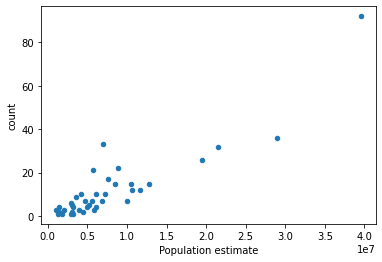

In [63]:
data.plot.scatter(x='Population estimate', y='count')

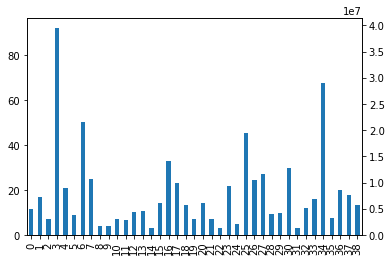

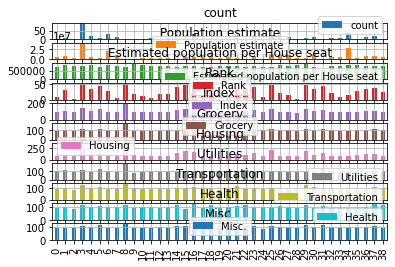

In [94]:
a= df.loc[:,'count'].plot(kind='bar')
b= df.loc[:,'Population estimate'].plot(kind='bar',secondary_y=True)
pd.DataFrame[a][b]
df.plot(kind='bar',grid=True,subplots=True,sharex=True); 

In [115]:
import numpy as np
import matplotlib.pyplot as plt

data = [[5., 25., 50., 20.],
  [4., 23., 51., 17.],
  [6., 22., 52., 19.]]

X = np.arange(4)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25)
plt.bar(X + 0.25, data[1], color = 'g', width = 0.25)
plt.bar(X + 0.50, data[2], color = 'r', width = 0.25)

plt.show()

In [119]:
pop_count = data.iloc[:,1:4]
pop_count.head
X = np.arange(4)

plt.bar(X + 0.25, pop_count[2], color = 'g', width = 0.25)
plt.bar(X + 0.50, pop_count[3], color = 'r', width = 0.25)

plt.show()

KeyError: 2

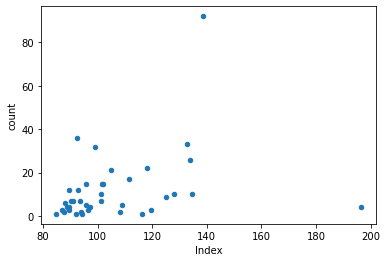

In [47]:
data.plot.scatter(x='Index', y='count')

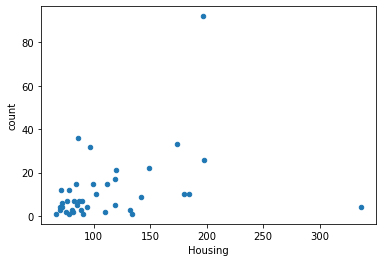

In [48]:
data.plot.scatter(x='Housing', y='count')

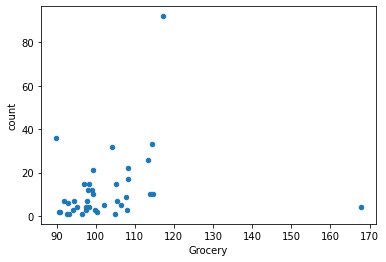

In [49]:
data.plot.scatter(x='Grocery', y='count')

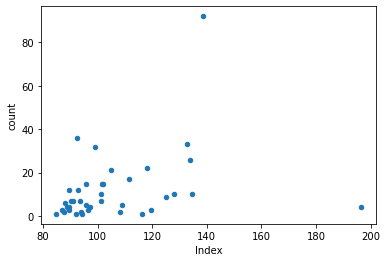

In [50]:
data.plot.scatter(x='Index', y='count')

In [57]:
import pandas as pd
median_income = pd.read_excel ('median income1.xlsx')
median_income_csv = median_income.to_csv('median_income.csv')
median_income1 = pd.read_csv('median_income.csv', index_col=0)
median_income1.columns.values[1] = "Annual_Mean"
median_income1.head()

,State,Annual_Mean,Median Monthly Rent,Value of a Dollar
0,Alabama,44930,998,1.15
1,Alaska,59290,1748,0.95
2,Arizona,50930,1356,1.04
3,Arkansas,42690,953,1.15
4,California,61290,2518,0.87


In [58]:
median_income1.rename(columns={'State':'state'}, inplace=True)

In [59]:
median_income1.columns.values[12] = "Annual_Mean"

IndexError: index 12 is out of bounds for axis 0 with size 4

In [60]:
median_income2= pd.merge(data, median_income1, on='state')
median_income2


,state,count,Population estimate,Estimated population per House seat,Rank,Index,Grocery,Housing,Utilities,Transportation,Health,Misc.,Annual_Mean,Median Monthly Rent,Value of a Dollar
0,Alabama,4,4903185,700455,7,89.4,95.1,70.2,103.3,92.3,90.4,97.5,44930,998,1.15
1,Arizona,10,7278717,808746,32,101.3,99.4,102.0,112.3,105.9,96.9,97.9,50930,1356,1.04
2,Arkansas,2,3017825,754451,3,87.8,90.7,75.2,92.7,86.1,86.2,95.7,42690,953,1.15
3,California,92,39512223,745514,50,138.5,117.3,196.5,122.2,132.4,112.7,110.8,61290,2518,0.87
4,Colorado,21,5758736,822677,35,105.0,99.2,119.6,87.6,101.5,103.1,101.7,57690,1927,0.97
5,Connecticut,9,3565287,713057,44,125.1,107.7,142.2,132.9,112.6,110.5,121.6,62350,1803,0.92
6,Florida,32,21477737,795472,29,99.0,104.2,96.8,101.1,99.1,97.5,98.3,47750,1590,1.00
7,Georgia,12,10617423,758387,6,89.4,99.0,71.3,91.3,97.0,97.5,96.2,49620,1262,1.09
8,Hawaii,4,1415872,707936,52,196.3,167.7,336.3,189.5,138.8,117.1,125.3,54930,2481,0.84
9,Idaho,1,1787065,893033,19,94.1,92.7,90.7,82.6,103.4,95.8,97.7,44890,1238,1.08


In [61]:
median_income2.to_csv('total_data.csv')

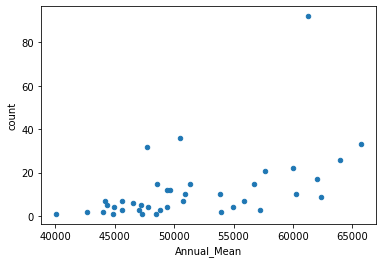

In [120]:
median_income2.plot.scatter( x='Annual_Mean', y='count',)

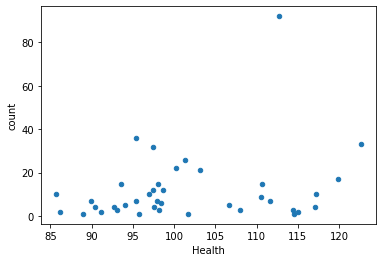

In [127]:
median_income2.plot.scatter( x='Health', y='count',)

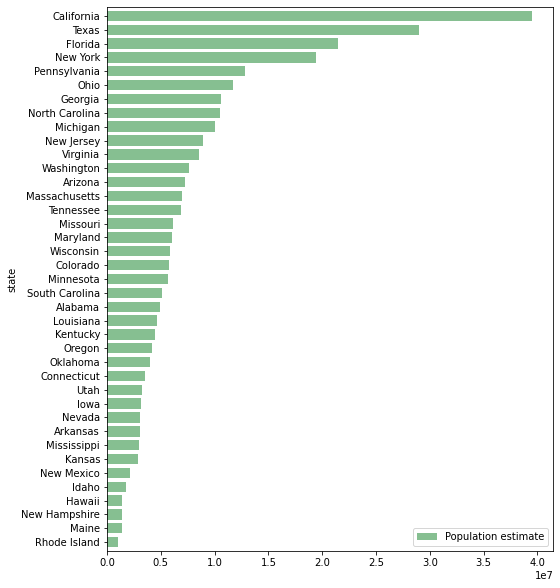

In [126]:
median_income2.sort_values('Population estimate',inplace=True)
median_income2.plot(x = 'state', y = 'Population estimate' ,kind='barh', figsize=(8, 10), color='#86bf91', width=0.75)